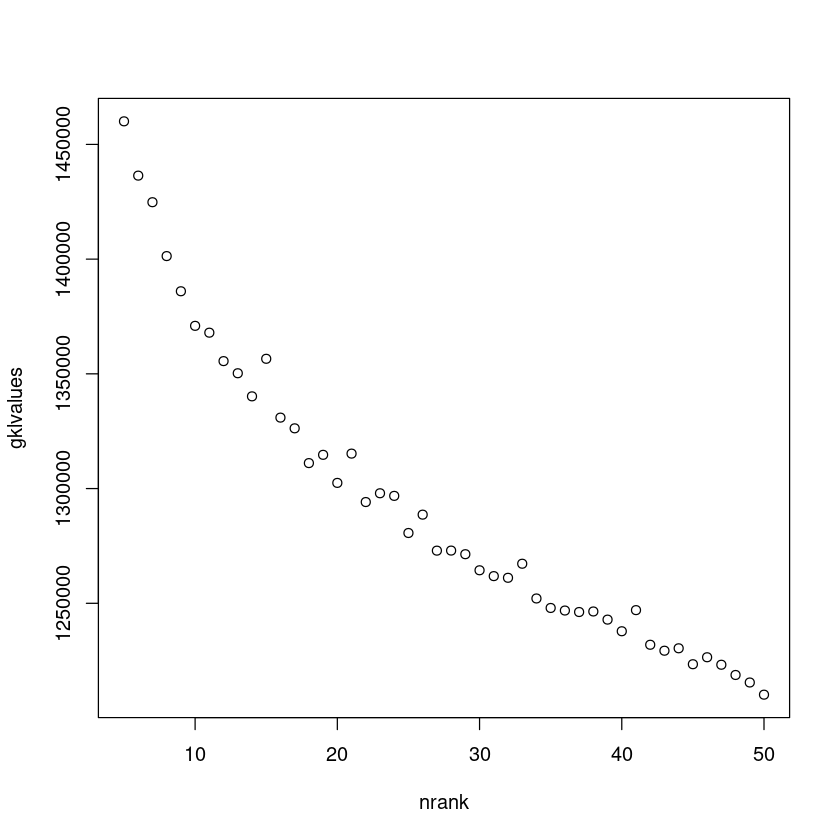

In [2]:
# get the gkl values
gklvalues = c()
i = 1
nrank = c(5:50)
for( x in nrank){
    load(paste0("modelssaved/LH5K_f",x,"_l001.RData"))
    gklvalues[i] = out$gkl
    i = i+1
}

plot(nrank,gklvalues)


In [7]:
load("modelssaved/LH5K_f10_l001.RData")

location = read.csv('data/LH_location.csv')
location = location[,-1]
location = as.matrix(location)

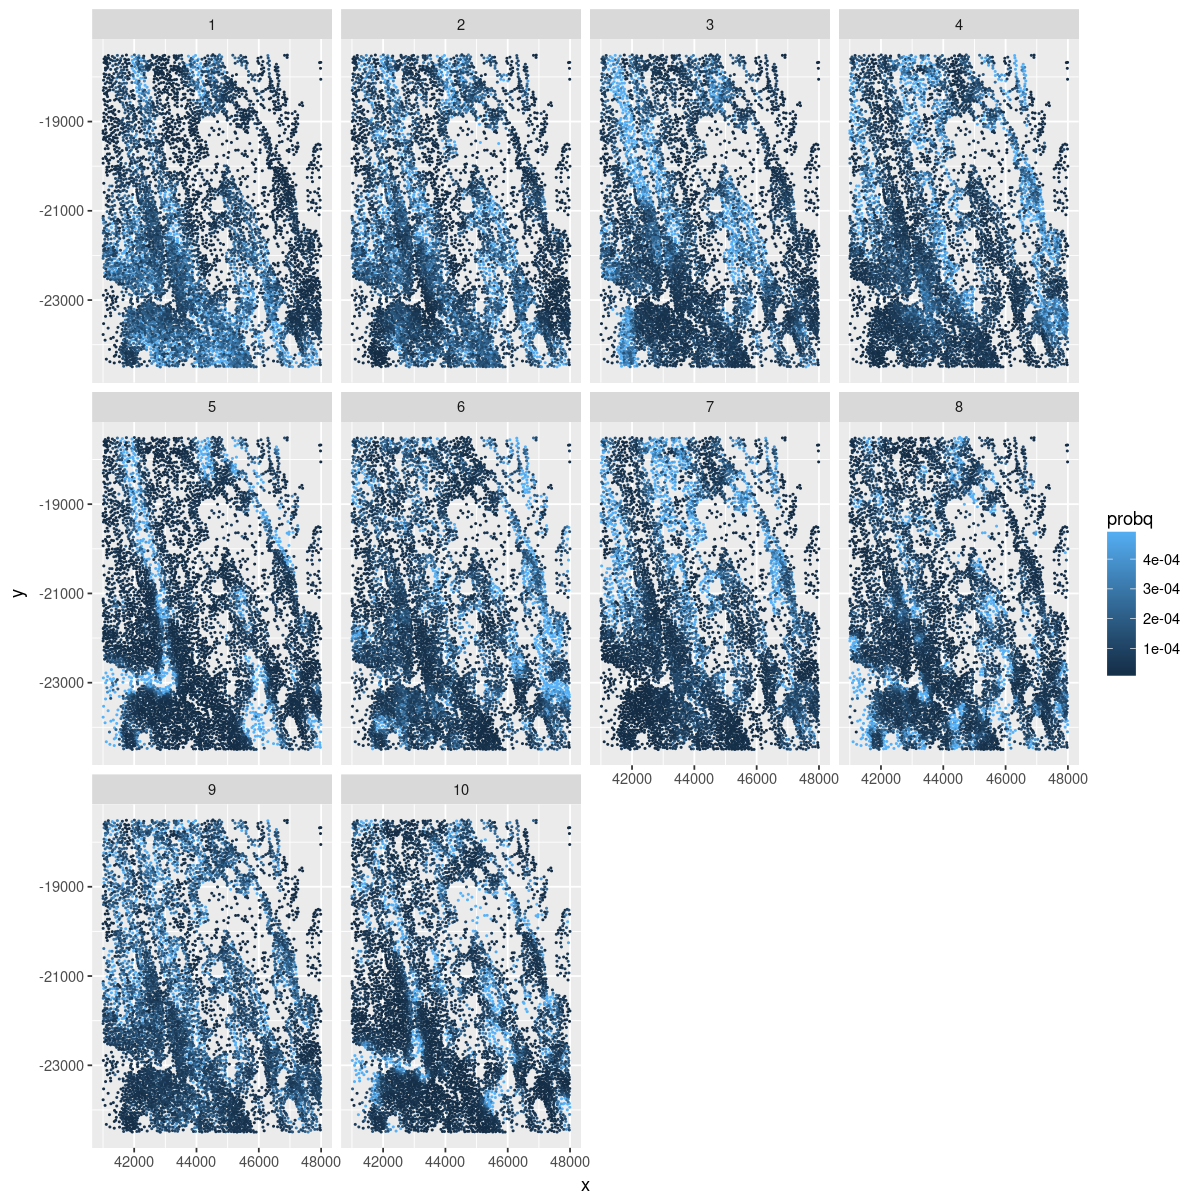

In [8]:
library(ggplot2)
plotdat = data.frame(x = location[,1], y = location[,2], all = t(t(out$exposures)/colSums(out$exposures)))

datalong = reshape(plotdat, varying = colnames(plotdat)[-c(1,2)], direction = 'long', v.names = "prob")
options(repr.plot.width=10, repr.plot.height=10)
datalong$probq = datalong$prob
qmax = quantile(datalong$probq, 0.95)
datalong$probq[datalong$prob > qmax] = qmax
ggplot(datalong, aes(x = x, y = y, col = probq))+
        geom_point(cex = 0.2)+ 
        #geom_point(cex = 0.5, alpha = 0.2)+
        #scale_colour_viridis()+
        facet_wrap(~time)
